In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import openweathermapy.core as owm
# Dependencies
import requests
import random
#from config import api_key
from config import gkey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from scipy import stats
from scipy.stats import linregress

In [3]:
Jan = pd.read_csv("RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb = pd.read_csv("RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar = pd.read_csv("RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr = pd.read_csv("RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May = pd.read_csv("RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun = pd.read_csv("RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul = pd.read_csv("RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug = pd.read_csv("RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep = pd.read_csv("RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct = pd.read_csv("RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov = pd.read_csv("RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec = pd.read_csv("RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)
Yearly18_Data = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])



In [6]:
Jan2 = pd.read_csv("RideShare_Data_201701.csv", parse_dates=[0], low_memory=False)
Feb2 = pd.read_csv("RideShare_Data_201702.csv", parse_dates=[0], low_memory=False)
Mar2 = pd.read_csv("RideShare_Data_201703.csv", parse_dates=[0], low_memory=False)
Apr2 = pd.read_csv("RideShare_Data_201704.csv", parse_dates=[0], low_memory=False)
May2 = pd.read_csv("RideShare_Data_201705.csv", parse_dates=[0], low_memory=False)
Jun2 = pd.read_csv("RideShare_Data_201706.csv", parse_dates=[0], low_memory=False)
Jul2 = pd.read_csv("RideShare_Data_201707.csv", parse_dates=[0], low_memory=False)
Aug2 = pd.read_csv("RideShare_Data_201708.csv", parse_dates=[0], low_memory=False)
Sep2 = pd.read_csv("RideShare_Data_201709.csv", parse_dates=[0], low_memory=False)
Oct2 = pd.read_csv("RideShare_Data_201710.csv", parse_dates=[0], low_memory=False)
Nov2 = pd.read_csv("RideShare_Data_201711.csv", parse_dates=[0], low_memory=False)
Dec2 = pd.read_csv("RideShare_Data_201712.csv", parse_dates=[0], low_memory=False)
Yearly17_Data = pd.concat([Jan2, Feb2, Mar2, Apr2, May2, Jun2, Jul2, Aug2, Sep2, Oct2, Nov2, Dec2])
Yearly17_Data.head()

,#,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description
0,0,2017-01-01 00:03:25,1970-01-01 00:00:00,232.0,0.0,"Two Bridges/Seward Park, Manhattan",NaN,10024.0,NaN,-24720483.0,42,44,4,803,Clouds,broken clouds
1,1,2017-01-01 00:04:55,1970-01-01 00:00:00,225.0,0.0,"Stuyvesant Heights, Brooklyn",NaN,11216.0,NaN,-24720485.0,42,44,4,803,Clouds,broken clouds
2,2,2017-01-01 00:04:58,1970-01-01 00:00:00,0.0,0.0,NaN,NaN,NaN,NaN,-24720485.0,42,44,4,803,Clouds,broken clouds
3,3,2017-01-01 00:05:31,1970-01-01 00:00:00,108.0,0.0,"Gravesend, Brooklyn",NaN,11216.0,NaN,-24720486.0,42,44,4,803,Clouds,broken clouds
4,4,2017-01-01 00:05:56,1970-01-01 00:00:00,36.0,0.0,"Bushwick North, Brooklyn",NaN,11216.0,NaN,-24720486.0,42,44,4,803,Clouds,broken clouds


In [7]:
#Yearly18_Data.head()
Yearly_Data = pd.concat([Yearly17_Data,Yearly18_Data])
Yearly_Data.head()

C:\Users\mghan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,#,DOlocationID,DropOff_datetime,Dropoff_City,Dropoff_ZipCode,PUlocationID,Pickup_City,Pickup_DateTime,Pickup_ZipCode,SR_Flag,Temp,Trip_Duration,humidity,weather_description,weather_id,weather_main,wind_speed
0,0,0.0,1970-01-01 00:00:00,NaN,NaN,232.0,"Two Bridges/Seward Park, Manhattan",2017-01-01 00:03:25,10024.0,NaN,42,-24720483.0,44,broken clouds,803,Clouds,4
1,1,0.0,1970-01-01 00:00:00,NaN,NaN,225.0,"Stuyvesant Heights, Brooklyn",2017-01-01 00:04:55,11216.0,NaN,42,-24720485.0,44,broken clouds,803,Clouds,4
2,2,0.0,1970-01-01 00:00:00,NaN,NaN,0.0,NaN,2017-01-01 00:04:58,NaN,NaN,42,-24720485.0,44,broken clouds,803,Clouds,4
3,3,0.0,1970-01-01 00:00:00,NaN,NaN,108.0,"Gravesend, Brooklyn",2017-01-01 00:05:31,11216.0,NaN,42,-24720486.0,44,broken clouds,803,Clouds,4
4,4,0.0,1970-01-01 00:00:00,NaN,NaN,36.0,"Bushwick North, Brooklyn",2017-01-01 00:05:56,11216.0,NaN,42,-24720486.0,44,broken clouds,803,Clouds,4


In [8]:
Yearly_Data["Years"] = pd.to_datetime(Yearly_Data["Pickup_DateTime"]).dt.year
Yearly_Data["Years"]

0        2017
1        2017
2        2017
3        2017
4        2017
5        2017
6        2017
7        2017
8        2017
9        2017
10       2017
11       2017
12       2017
13       2017
14       2017
15       2017
16       2017
17       2017
18       2017
19       2017
20       2017
21       2017
22       2017
23       2017
24       2017
25       2017
26       2017
27       2017
28       2017
29       2017
         ... 
84970    2018
84971    2018
84972    2018
84973    2018
84974    2018
84975    2018
84976    2018
84977    2018
84978    2018
84979    2018
84980    2018
84981    2018
84982    2018
84983    2018
84984    2018
84985    2018
84986    2018
84987    2018
84988    2018
84989    2018
84990    2018
84991    2018
84992    2018
84993    2018
84994    2018
84995    2018
84996    2018
84997    2018
84998    2018
84999    2018
Name: Years, Length: 2040000, dtype: int64

In [9]:
Yearly_Data["hours"] =pd.to_datetime(Yearly_Data["Pickup_DateTime"]).dt.hour
Yearly_Data["hours"]

# Create bins in which to place values based upon TED Talk views
bins = [-1, 11, 12, 16, 17, 23]
       

# Create labels for these bins
group_labels = ["Morning", "Noon", "afternoon", "evening", "night"]

In [10]:
Yearly_Data["hours_group"]= pd.cut(Yearly_Data["hours"], bins, labels=group_labels)

In [11]:
Yearly_Data["month"] =pd.to_datetime(Yearly_Data["Pickup_DateTime"]).dt.month



In [12]:
def fmonthofyear(x):
    return {
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec',
     }.get(x, "NA")




Yearly_Data["month_name"]= Yearly_Data["month"].apply(fmonthofyear)
Yearly_Data["month_name"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [13]:
month_group = Yearly_Data.groupby(['hours_group','Years','month']).size().reset_index(name='count') 
month_group 

month_df = Yearly_Data.groupby(Yearly_Data["month"])["Trip_Duration"].mean().reset_index(name='mean') 
month_df.dtypes 
month_group 

,hours_group,Years,month,count
0,Morning,2017,1,32040
1,Morning,2017,2,31954
2,Morning,2017,3,32326
3,Morning,2017,4,33178
4,Morning,2017,5,32973
5,Morning,2017,6,31928
6,Morning,2017,7,32087
7,Morning,2017,8,31293
8,Morning,2017,9,30898
9,Morning,2017,10,31490


In [14]:
pv_table = pd.pivot_table(month_group, values='count', index=['Years','month'],
                    columns=['hours_group'], aggfunc=np.sum)
pv_table


hours_group  Morning  Noon  afternoon  evening  night
Years month                                          
2017  1        32040  3635      16001     4996  28328
      2        31954  3733      15331     4615  29367
      3        32326  3469      15249     4559  29397
      4        33178  3606      15112     4613  28491
      5        32973  3761      15665     4583  28018
      6        31928  3588      15401     4624  29459
      7        32087  3502      15248     4618  29545
      8        31293  3558      15638     4810  29701
      9        30898  3454      15671     4721  30256
      10       31490  3524      15507     4884  29595
      11       30671  3445      15655     5173  30056
      12       30078  3570      15663     4877  30812
2018  1        31338  3482      15836     5035  29309
      2        29977  3507      16059     5116  30341
      3        30958  3528      15765     5004  29745
      4        31524  3543      15762     4800  29371
      5        30911  3612      16402     4982  29093
      6        31420  3641      16251     4736  28952
      7        31293  3607      16123     4940  29037
      8        31200  3663      16446     4871  28820
      9        31312  3636      16436     4850  28766
      10       31409  3500      15869     4783  29439
      11       30577  3532      16096     5107  29688
      12       30325  3663      15960     4984  30068

In [15]:
pv_table.columns

CategoricalIndex(['Morning', 'Noon', 'afternoon', 'evening', 'night'], categories=['Morning', 'Noon', 'afternoon', 'evening', 'night'], ordered=True, name='hours_group', dtype='category')

In [16]:
pv_table.columns = pd.Index(list(pv_table.columns))
pv_table

Morning  Noon  afternoon  evening  night
Years month                                          
2017  1        32040  3635      16001     4996  28328
      2        31954  3733      15331     4615  29367
      3        32326  3469      15249     4559  29397
      4        33178  3606      15112     4613  28491
      5        32973  3761      15665     4583  28018
      6        31928  3588      15401     4624  29459
      7        32087  3502      15248     4618  29545
      8        31293  3558      15638     4810  29701
      9        30898  3454      15671     4721  30256
      10       31490  3524      15507     4884  29595
      11       30671  3445      15655     5173  30056
      12       30078  3570      15663     4877  30812
2018  1        31338  3482      15836     5035  29309
      2        29977  3507      16059     5116  30341
      3        30958  3528      15765     5004  29745
      4        31524  3543      15762     4800  29371
      5        30911  3612      16402     4982  29093
      6        31420  3641      16251     4736  28952
      7        31293  3607      16123     4940  29037
      8        31200  3663      16446     4871  28820
      9        31312  3636      16436     4850  28766
      10       31409  3500      15869     4783  29439
      11       30577  3532      16096     5107  29688
      12       30325  3663      15960     4984  30068

In [17]:
pv_table = pv_table.reset_index()

In [18]:
pv_table

,Years,month,Morning,Noon,afternoon,evening,night
0,2017,1,32040,3635,16001,4996,28328
1,2017,2,31954,3733,15331,4615,29367
2,2017,3,32326,3469,15249,4559,29397
3,2017,4,33178,3606,15112,4613,28491
4,2017,5,32973,3761,15665,4583,28018
5,2017,6,31928,3588,15401,4624,29459
6,2017,7,32087,3502,15248,4618,29545
7,2017,8,31293,3558,15638,4810,29701
8,2017,9,30898,3454,15671,4721,30256
9,2017,10,31490,3524,15507,4884,29595


In [19]:

year = pv_table.iloc[:, 0]

year
pv_table.iloc[:, 4]

0     16001
1     15331
2     15249
3     15112
4     15665
5     15401
6     15248
7     15638
8     15671
9     15507
10    15655
11    15663
12    15836
13    16059
14    15765
15    15762
16    16402
17    16251
18    16123
19    16446
20    16436
21    15869
22    16096
23    15960
Name: afternoon, dtype: int64

In [20]:
# Grab morning rates
morning_rate = pv_table.iloc[:, 2]
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(
    year, morning_rate)
m_fit = m_slope * year + m_int
m_p

0.02406638958211603

In [21]:
# Grab morning rates
noon_rate = pv_table.iloc[:, 3]
n_slope, n_int, n_r, n_p, n_std_err = stats.linregress(
    year, noon_rate)
n_fit = n_slope * year + n_int
n_p

0.8722833211658062

In [22]:
# Grab afternoon rates
afternoon_rate = pv_table.iloc[:, 4]
a_slope, a_int, a_r, a_p, a_std_err = stats.linregress(
    year, afternoon_rate)
a_fit = a_slope * year + a_int
a_p

1.4305100746067973e-05

In [23]:
# Grab evening rates
evening_rate = pv_table.iloc[:, 5]
e_slope, e_int, e_r, e_p, e_std_err = stats.linregress(
    year, evening_rate)
e_fit = e_slope * year + e_int
e_p

0.013991430663346965

In [24]:
# Grab night rates
night_rate = pv_table.iloc[:, 6]
nt_slope, nt_int, nt_r, nt_p, nt_std_err = stats.linregress(
    year, night_rate)
nt_fit = nt_slope * year + nt_int
nt_p

0.9051777012685563

<IPython.core.display.Javascript object>


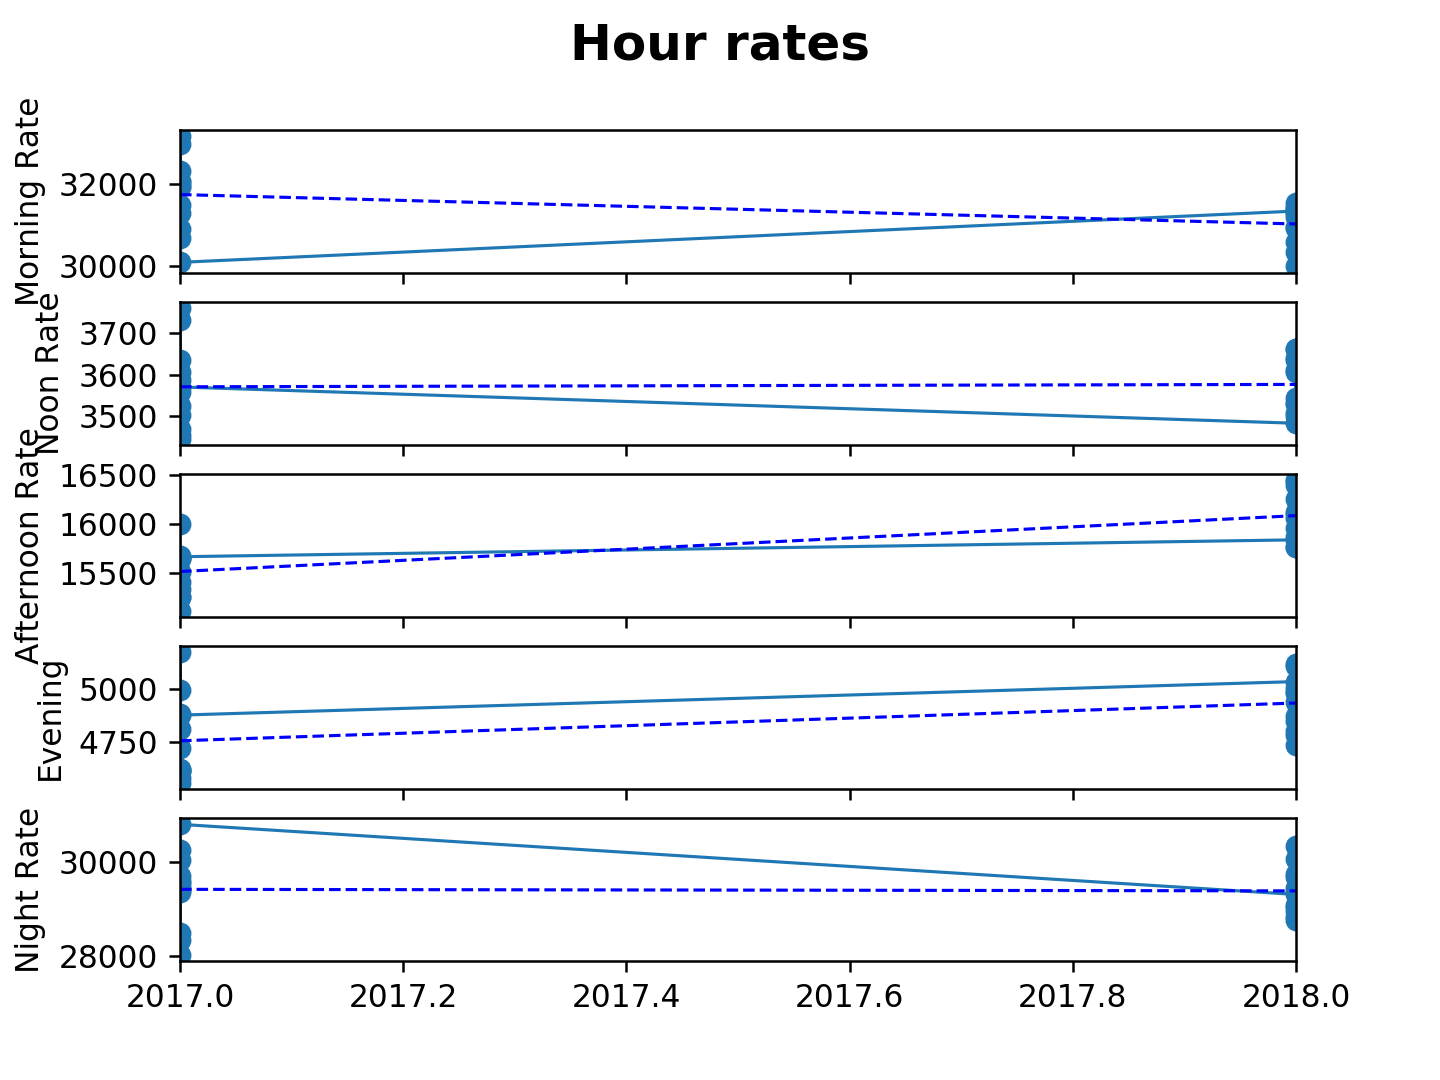

Text(0, 0.5, 'Night Rate')

In [25]:
# Plot
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5, sharex=True)
fig.suptitle("Hour rates", fontsize=16, fontweight="bold")

ax1.set_xlim(min(year), max(year))
ax1.plot(year, morning_rate, linewidth=1, marker="o")
ax1.plot(year, m_fit, "b--", linewidth=1)
ax1.set_ylabel("Morning Rate")

ax2.plot(year, noon_rate, linewidth=1, marker="o")
ax2.plot(year, n_fit, "b--", linewidth=1)
ax2.set_ylabel("Noon Rate")

ax3.plot(year, afternoon_rate, linewidth=1, marker="o")
ax3.plot(year, a_fit, "b--", linewidth=1)
ax3.set_ylabel("Afternoon Rate")

ax4.plot(year, evening_rate, linewidth=1, marker="o")
ax4.plot(year, e_fit, "b--", linewidth=1)
ax4.set_ylabel("Evening")

ax5.plot(year, night_rate, linewidth=1, marker="o")
ax5.plot(year, nt_fit, "b--", linewidth=1)
ax5.set_ylabel("Night Rate")

In [26]:
# Print results and save image
year = 2019
print("The morning rate in 2019 will be " +
      str(m_slope * year + m_int) + ".")
print("The noon rate in 2019 will be " + str(n_slope * year + n_int) + ".")
print("The afternoon rate in 2019 will be " +
      str(a_slope * year + a_int) + ".")
print("The evening rate in 2019 will be " + str(e_slope * year + e_int) + ".")
print("The night rate in 2019 will be " + str(nt_slope * year + nt_int) + ".")
#plt.savefig("../Images/18-final-plot.png")

The morning rate in 2019 will be 30297.666666666744.
The noon rate in 2019 will be 3581.916666666666.
The afternoon rate in 2019 will be 16655.75.
The evening rate in 2019 will be 5111.916666666686.
The night rate in 2019 will be 29352.75.
